In [34]:
"""Note: this nb is self-contained, just requires the one saved pkl model in the results folder.
The point is to see how the Emb-grams model does on unseen tokens at test-time.
Specifically, we check the top-interacting words that exist in the test set but not in the train set.
"""

%load_ext autoreload
%autoreload 2
import torch
from transformers import BertModel, DistilBertModel
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import datasets
import numpy as np
import os.path
from spacy.lang.en import English
from datasets import load_from_disk
import pickle as pkl
from sklearn.linear_model import LogisticRegressionCV
from collections import defaultdict
from copy import deepcopy
from tqdm import tqdm
import sys
sys.path.append('..')
import analyze_helper
import dvu
dvu.set_style()

import pandas as pd
from os.path import join as oj
import string
from typing import List
import data
import matplotlib.pyplot as plt
import seaborn as sns
import config
pd.set_option('display.max_rows', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
rs = pd.read_pickle(oj(config.results_dir, 'rs_vary_ngrams_test.pkl'))

# rr, r_sem = analyze_helper.average_seeds(rs)
rs.head()

,checkpoint,ngrams,ngrams_test,subsample,all,norm,dataset,seed,layer,parsing,ignore_cache,padding,dataset_key_text,num_features,acc_train,acc_val
0,nateraw/bert-base-uncased-emotion,1,1,-1,all,,emotion,1,last_hidden_state_mean,,True,True,text,768,0.907875,0.874
1,nateraw/bert-base-uncased-emotion,1,2,-1,all,,emotion,1,last_hidden_state_mean,,True,True,text,768,0.907875,0.846
2,nateraw/bert-base-uncased-emotion,1,3,-1,all,,emotion,1,last_hidden_state_mean,,True,True,text,768,0.907875,0.848
3,nateraw/bert-base-uncased-emotion,1,4,-1,all,,emotion,1,last_hidden_state_mean,,True,True,text,768,0.907875,0.851
4,nateraw/bert-base-uncased-emotion,1,5,-1,all,,emotion,1,last_hidden_state_mean,,False,True,text,768,0.907875,0.874


In [37]:
dset = 'emotion'
d = rs[rs.dataset == dset]
d[['ngrams', 'ngrams_test', 'acc_val']].head()

,ngrams,ngrams_test,acc_val
0,1,1,0.874
1,1,2,0.846
2,1,3,0.848
3,1,4,0.851
4,1,5,0.874


In [38]:
N = 7
heatmap = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        row = d[
            (d.ngrams == i + 1) & (d.ngrams_test == j + 1)
        ]
        # print(row.shape)
        if row.shape[0] == 1:
            heatmap[i, j] = row['acc_val']
        else:
            print('skipped', i, j, 'shape', row.shape[0])


skipped 3 2 shape 0
skipped 3 3 shape 0
skipped 3 4 shape 0
skipped 3 6 shape 0
skipped 4 0 shape 0
skipped 4 1 shape 0
skipped 4 2 shape 0


Text(0.5, 23.52222222222222, 'Order testing')

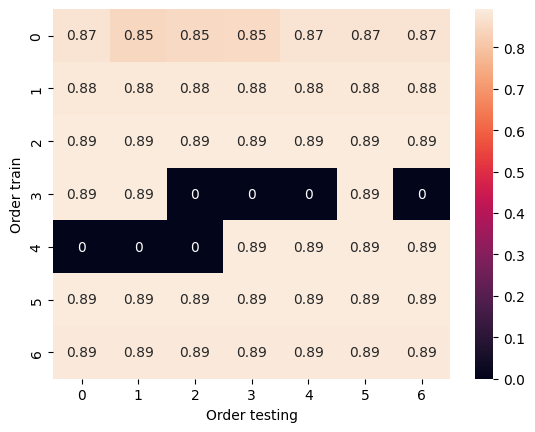

In [39]:
sns.heatmap(heatmap, annot=True)
plt.ylabel('Order train')
plt.xlabel('Order testing')